# Hi Bob!

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
data = pd.read_csv("dataset.csv")
data.head()

,feature_1,feature_2,feature_3,feature_4,isVirus
0,-0.233467,0.308799,2.484015,1.732721,False
1,1.519003,1.238482,3.344450,0.783744,False
2,0.400640,1.916748,3.291096,-0.918519,False
3,-1.616474,0.209703,1.461544,-0.291837,False
4,1.480515,5.299829,2.640670,1.867559,True


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  1897 non-null   float64
 1   feature_2  1899 non-null   float64
 2   feature_3  1893 non-null   float64
 3   feature_4  1897 non-null   float64
 4   isVirus    1999 non-null   bool   
dtypes: bool(1), float64(4)
memory usage: 64.5 KB


##### All instances are labelled but, some have NaN values. Therefore, we need a method to fill the missing values.

In [24]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
feature_1,1897.0,NaN,NaN,NaN,0.814404,1.729538,-2.285499,-0.556433,0.084789,2.270955,5.929096
feature_2,1899.0,NaN,NaN,NaN,1.795843,1.605611,-7.363119,0.975148,1.881904,2.840511,7.549658
feature_3,1893.0,NaN,NaN,NaN,2.621096,1.474973,-5.363119,1.671905,2.499623,3.4702,9.549658
feature_4,1897.0,NaN,NaN,NaN,0.807499,1.768597,-3.006499,-0.563357,0.021857,2.319822,5.759355
isVirus,1999,2,False,1332,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### It seems like we have some outliers in our datasets too. Especially in feature 2 and 3. Outlier means a value that has extraordinary characteristics. We need to get rid of them somehow and train our model accordingly. However, the outliers can be good indicators for our seperator too. So our model can become worse after cleaning the outliers as well.

In [25]:
data.iloc[:,:4].corr()

,feature_1,feature_2,feature_3,feature_4
feature_1,1.000000,0.427723,0.128848,0.787798
feature_2,0.427723,1.000000,0.144642,0.437098
feature_3,0.128848,0.144642,1.000000,0.133725
feature_4,0.787798,0.437098,0.133725,1.000000


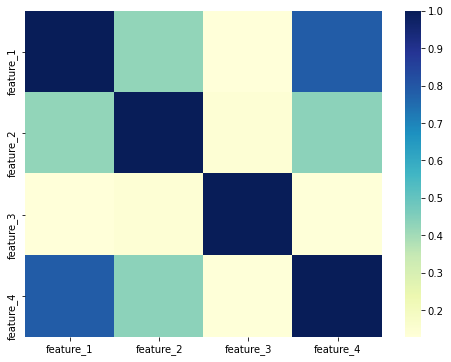

In [26]:
plt.figure(figsize=(8,6))
sns.heatmap(data.iloc[:,:4].corr() ,cmap="YlGnBu")
plt.show()

##### Also there is a clear relationship between feature 1 and 4 

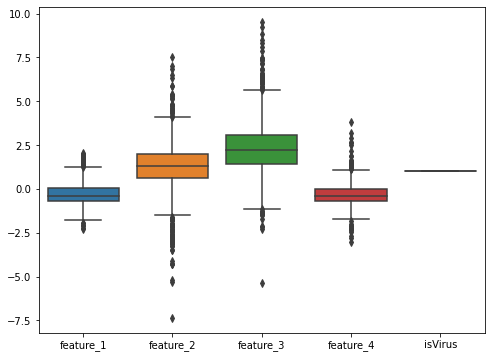

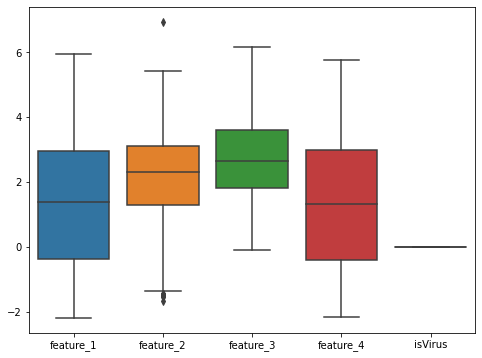

In [27]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data[data["isVirus"]==True])
plt.show()
plt.figure(figsize=(8,6))
sns.boxplot(data=data[data["isVirus"]==False])
plt.show()

##### As we can see from that, virus instances have outliers which is expected. Also an indicator that we shouldn't clear the outliers in order to have a good prediction

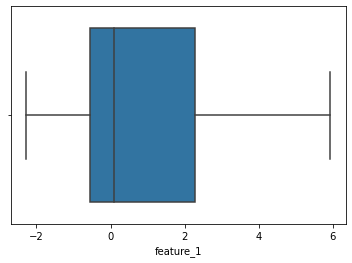

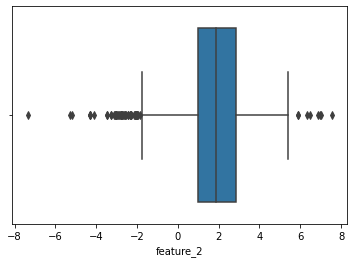

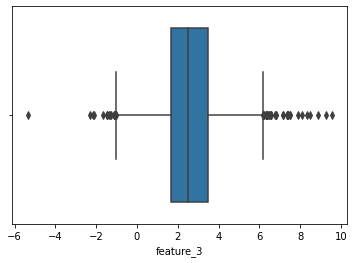

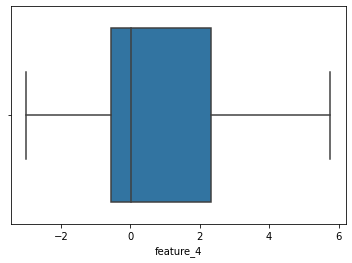

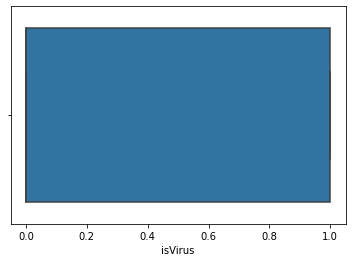

In [28]:
for feature in data.columns:
    sns.boxplot(data=data,x=feature,hue="isVirus")
    plt.show()

##### We validate our assumptions via box plots. There are some outliers in feature 2 and 3. But like mentioned above we won't touch outliers

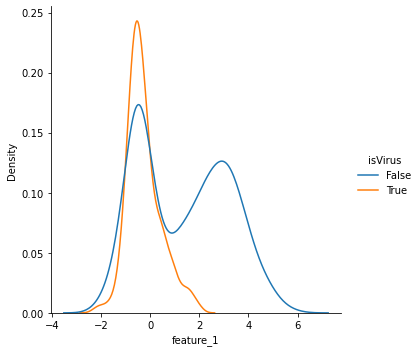

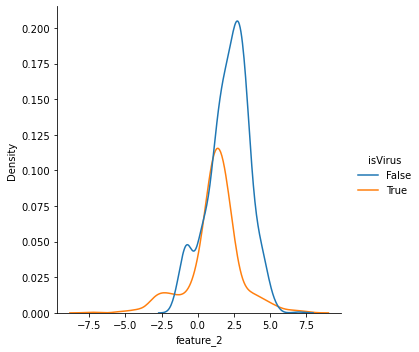

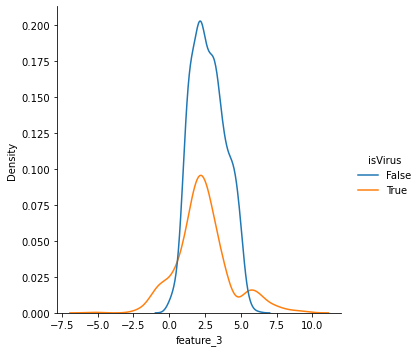

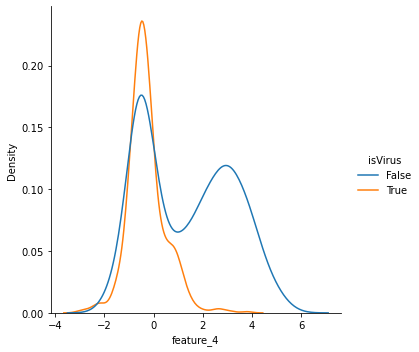

C:\Users\erenk\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\erenk\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


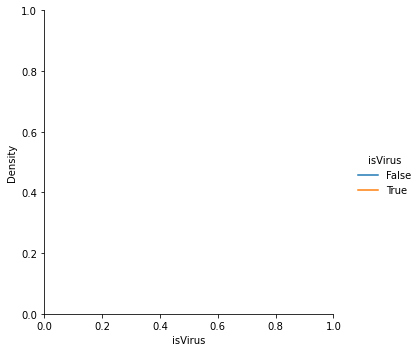

In [29]:
for feature in data.columns:
    sns.displot(data,x=feature,hue="isVirus",kind="kde")
    plt.show()

##### According to distributions, there are some distinc values that seperates virus and non viruses so, decision trees structure model can be a good choice. Also distribution tells us, again, not to touch outliers.

##### To fill nan values I believe it will be good choice to use K-NN regressior. Because it is simple to use. Also I will label outliers as nan values then I will put them in model too.

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["isVirus"] = le.fit_transform(data["isVirus"])
# Before putting data into "nan value filling model" we have to convert the "IsVirus" column to numerical
# 0 as False
# 1 as True

##### We will use two model to predict. In first one I will try to fill Nan values by training another small model . In second one I will try to drop Nan values and train model

In [43]:
data2 = data.copy()
data2.dropna(inplace=True)

In [44]:
not_null_df = data.dropna()
not_null_df

,feature_1,feature_2,feature_3,feature_4,isVirus
0,-0.233467,0.308799,2.484015,1.732721,0
1,1.519003,1.238482,3.344450,0.783744,0
2,0.400640,1.916748,3.291096,-0.918519,0
3,-1.616474,0.209703,1.461544,-0.291837,0
4,1.480515,5.299829,2.640670,1.867559,1
...,...,...,...,...,...
1991,5.153120,3.468305,3.112738,3.657268,0
1993,2.932724,1.681604,2.629296,2.054384,0
1994,2.532559,2.139847,3.859104,2.190373,0
1996,4.059027,1.977436,2.144760,4.257220,0


In [45]:
data[data["feature_1"]==0],data[data["feature_2"]==0],data[data["feature_3"]==0],data[data["feature_4"]==0]

(Empty DataFrame
 Columns: [feature_1, feature_2, feature_3, feature_4, isVirus]
 Index: [],
 Empty DataFrame
 Columns: [feature_1, feature_2, feature_3, feature_4, isVirus]
 Index: [],
 Empty DataFrame
 Columns: [feature_1, feature_2, feature_3, feature_4, isVirus]
 Index: [],
 Empty DataFrame
 Columns: [feature_1, feature_2, feature_3, feature_4, isVirus]
 Index: [])

##### There are no features equals 0 so I can fill nan values as zero

In [46]:
data.fillna(0,inplace=True)

In [47]:
feature_1_will_predicted = data[data["feature_1"]==0][["feature_2","feature_3","feature_4","isVirus"]]
feature_2_will_predicted = data[data["feature_2"]==0][["feature_1","feature_3","feature_4","isVirus"]]
feature_3_will_predicted = data[data["feature_3"]==0][["feature_1","feature_2","feature_4","isVirus"]]
feature_4_will_predicted = data[data["feature_4"]==0][["feature_1","feature_2","feature_3","isVirus"]]

In [48]:
from sklearn.neighbors import KNeighborsRegressor
# I picked n-neigbors as 10 to have near optimal generilization considering the total number of instances are 1998
neighbors_proportion = 0.2

clf1 = KNeighborsRegressor(n_neighbors=int(len(not_null_df)*neighbors_proportion))
X_1 = data[["feature_2","feature_3","feature_4","isVirus"]]
y_1 = data[["feature_1"]]
clf1.fit(X_1,y_1)
prediction_1 = clf1.predict(feature_1_will_predicted)

clf2 = KNeighborsRegressor(n_neighbors=int(len(not_null_df)*neighbors_proportion))
X_2 = data[["feature_1","feature_3","feature_4","isVirus"]]
y_2 = data[["feature_2"]]
clf2.fit(X_2,y_2)
prediction_2 = clf2.predict(feature_2_will_predicted) 

clf3 = KNeighborsRegressor(n_neighbors=int(len(not_null_df)*neighbors_proportion))
X_3 = data[["feature_1","feature_2","feature_4","isVirus"]]
y_3 = data[["feature_3"]]
clf3.fit(X_3,y_3)
prediction_3 = clf3.predict(feature_3_will_predicted)

clf4 = KNeighborsRegressor(n_neighbors=int(len(not_null_df)*neighbors_proportion))
X_4 = data[["feature_1","feature_2","feature_3","isVirus"]]
y_4 = data[["feature_4"]]
clf4.fit(X_4,y_4)
prediction_4 = clf4.predict(feature_4_will_predicted)

In [49]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
feature_1,1999.0,0.772848,1.694321,-2.285499,-0.531888,0.000000,2.185465,5.929096
feature_2,1999.0,1.706006,1.613164,-7.363119,0.775360,1.798798,2.792420,7.549658
feature_3,1999.0,2.482108,1.550896,-5.363119,1.526790,2.386273,3.412488,9.549658
feature_4,1999.0,0.766296,1.732005,-3.006499,-0.538374,0.000000,2.177811,5.759355
isVirus,1999.0,0.333667,0.471640,0.000000,0.000000,0.000000,1.000000,1.000000


In [50]:
prediction_3.mean(),prediction_3.std(),prediction_3.min(),prediction_3.max()

(2.5692923573756454, 0.2481852687595315, 1.917186324896672, 2.9000410466860522)

##### We can see that we did not change the mean so much

In [51]:
data.loc[data["feature_1"]==0,"feature_1"] = prediction_1
data.loc[data["feature_2"]==0,"feature_2"] = prediction_2
data.loc[data["feature_3"]==0,"feature_3"] = prediction_3
data.loc[data["feature_4"]==0,"feature_4"] = prediction_4

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  1999 non-null   float64
 1   feature_2  1999 non-null   float64
 2   feature_3  1999 non-null   float64
 3   feature_4  1999 non-null   float64
 4   isVirus    1999 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 78.2 KB


##### There are no missing values left so we can continue with our main model

# Main Model

In [53]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
feature_1,1999.0,0.817300,1.710014,-2.285499,-0.531888,0.077396,2.299487,5.929096
feature_2,1999.0,1.788167,1.572476,-7.363119,1.019319,1.840579,2.801100,7.549658
feature_3,1999.0,2.618349,1.436498,-5.363119,1.719963,2.530425,3.412488,9.549658
feature_4,1999.0,0.812418,1.748671,-3.006499,-0.538374,0.015956,2.368716,5.759355
isVirus,1999.0,0.333667,0.471640,0.000000,0.000000,0.000000,1.000000,1.000000


In [61]:
from sklearn.model_selection import train_test_split

X_1 = data[data.columns[0:4]]
y_1 = data["isVirus"]

X_2 = data2[data2.columns[0:4]]
y_2 = data2["isVirus"]

X_train1,X_test1,y_train1,y_test1 = train_test_split(X_1 , y_1,test_size=0.25,random_state=42)
X_train2,X_test2,y_train2,y_test2 = train_test_split(X_2 , y_2,test_size=0.25,random_state=42)

#### By setting hyperparameters like max depth and min samples leaf we can overcome overfitting problem

In [77]:
from sklearn.ensemble import RandomForestClassifier

clf1 = RandomForestClassifier(n_estimators=60, 
                            max_depth=11,
                            max_features='auto', 
                            min_samples_leaf=9,
                            bootstrap=True,  
                            random_state=42)

clf2 = RandomForestClassifier(n_estimators=60, 
                            max_depth=11,
                            max_features='auto', 
                            min_samples_leaf=9,
                            bootstrap=True,  
                            random_state=42)


clf1.fit(X_train1,y_train1)
clf2.fit(X_train2,y_train2)

print("Model 1 training score",clf1.score(X_train1,y_train1))
print("Model 1 test score",clf1.score(X_test1,y_test1))
print("--------------------------------------------------------")
print("Model 2 training score",clf2.score(X_train2,y_train2))
print("Model 2 test score",clf2.score(X_test2,y_test2))

Model 1 training score 0.9132755170113409
Model 1 test score 0.884
--------------------------------------------------------
Model 2 training score 0.928453947368421
Model 2 test score 0.854679802955665


#### It is a clear indicator that our small model to fill nan values influenced main model positively

#### We can improve our solution with hyperparameter optimization 

## Evaluation

##### For evaluating classification models confusion matrix is the best method. We can see which kinds (Type1 and Type2 error) of mistake we have done.

In [91]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(y_test1,clf1.predict(X_test1))
cm

array([[315,  23],
       [ 35, 127]], dtype=int64)

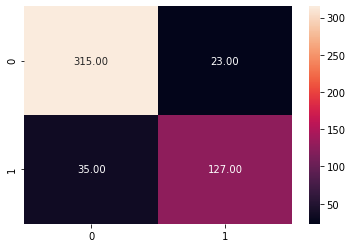

In [92]:
sns.heatmap(cm,annot=True,fmt='.2f')
#plt.xlable("")
plt.show()

In [93]:
classification_report(y_test1,clf1.predict(X_test1))

'              precision    recall  f1-score   support\n\n           0       0.90      0.93      0.92       338\n           1       0.85      0.78      0.81       162\n\n    accuracy                           0.88       500\n   macro avg       0.87      0.86      0.86       500\nweighted avg       0.88      0.88      0.88       500\n'

## Bob e-mail me if you have further questions. Bye-bye
## e-mail:erenkotar@hotmail.com